In [71]:
import pandas as pd
import numpy as np

# Machine learning tools
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import joblib


In [72]:
# Load dataset
df = pd.read_csv("csv_result-KDDTrain+.csv")

print("Shape of dataset:", df.shape)
print(df.head())


Shape of dataset: (33940, 43)
   id  'duration' 'protocol_type' 'service' 'flag'  'src_bytes'  'dst_bytes'  \
0   1           0             tcp  ftp_data     SF          491            0   
1   2           0             udp     other     SF          146            0   
2   3           0             tcp   private     S0            0            0   
3   4           0             tcp      http     SF          232         8153   
4   5           0             tcp      http     SF          199          420   

   'land'  'wrong_fragment'  'urgent'  ...  'dst_host_srv_count'  \
0       0                 0         0  ...                  25.0   
1       0                 0         0  ...                   1.0   
2       0                 0         0  ...                  26.0   
3       0                 0         0  ...                 255.0   
4       0                 0         0  ...                 255.0   

   'dst_host_same_srv_rate'  'dst_host_diff_srv_rate'  \
0                      

In [73]:
# ✅ Remove quotes from column names
df.columns = df.columns.str.replace("'", "").str.strip()

# ✅ Check columns
print("Columns:", df.columns.tolist())

# Fill missing values if any
df.fillna(0, inplace=True)

# Separate features & target
X = df.drop(["id", "class"], axis=1)  # remove id + target
y = df["class"]

# Identify categorical columns
categorical_cols = X.select_dtypes(include=['object']).columns
print("Categorical columns:", categorical_cols)

# Encode categorical features
from sklearn.preprocessing import LabelEncoder

label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    label_encoders[col] = le


Columns: ['id', 'duration', 'protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell', 'su_attempted', 'num_root', 'num_file_creations', 'num_shells', 'num_access_files', 'num_outbound_cmds', 'is_host_login', 'is_guest_login', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'class']
Categorical columns: Index(['protocol_type', 'service', 'flag'], dtype='object')


In [76]:
# Ensure target column is string type
y = df["class"].astype(str)

from sklearn.preprocessing import LabelEncoder
target_encoder = LabelEncoder()
y = target_encoder.fit_transform(y)

print("Target classes mapping:")
for idx, cls in enumerate(target_encoder.classes_):
    print(f"{cls} → {idx}")


Target classes mapping:
0 → 0
anomaly → 1
normal → 2


In [77]:
print(df["class"].unique())


['normal' 'anomaly' 0]


In [78]:
# Convert everything to string
df["class"] = df["class"].astype(str)

# Replace "0" with "anomaly" (so only 2 unique classes remain)
df["class"] = df["class"].replace("0", "anomaly")

# Now check unique values again
print("Unique target values:", df["class"].unique())


Unique target values: ['normal' 'anomaly']


In [79]:
from sklearn.preprocessing import LabelEncoder

target_encoder = LabelEncoder()
y = target_encoder.fit_transform(df["class"])

print("Target classes mapping:")
for idx, cls in enumerate(target_encoder.classes_):
    print(f"{cls} → {idx}")


Target classes mapping:
anomaly → 0
normal → 1


In [80]:
from sklearn.model_selection import train_test_split

# Drop id + class to get features
X = df.drop(["id", "class"], axis=1)

# Encode categorical features
from sklearn.preprocessing import LabelEncoder, StandardScaler

categorical_cols = X.select_dtypes(include=['object']).columns
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    label_encoders[col] = le

# Scale features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

print("Training size:", X_train.shape, "Testing size:", X_test.shape)


Training size: (23758, 41) Testing size: (10182, 41)


In [81]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [82]:
y_pred = model.predict(X_test)


In [83]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

print("✅ Model Evaluation Results:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='binary'))
print("Recall:", recall_score(y_test, y_pred, average='binary'))
print("F1-Score:", f1_score(y_test, y_pred, average='binary'))

print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=target_encoder.classes_))


✅ Model Evaluation Results:
Accuracy: 0.9978393242977804
Precision: 0.9968721251149955
Recall: 0.9990780011063987
F1-Score: 0.9979738441701971

Classification Report:
               precision    recall  f1-score   support

     anomaly       1.00      1.00      1.00      4759
      normal       1.00      1.00      1.00      5423

    accuracy                           1.00     10182
   macro avg       1.00      1.00      1.00     10182
weighted avg       1.00      1.00      1.00     10182



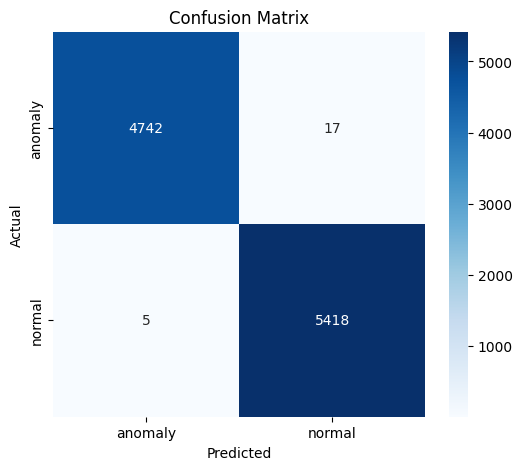

In [84]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=target_encoder.classes_,
            yticklabels=target_encoder.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()
